# COURSE PROJECT. WORLD HAPPINESS REPORT

## A. Importing, cleaning and numerical summaries
### A1, A.2. Loading the libraries and the data: World Happiness Report

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('data.csv')
# checking that the data is loaded correctly:
df1.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


### A.3. The number of observations

In [3]:
df1.index

RangeIndex(start=0, stop=153, step=1)

The number of observations = 153

### A.4. The column headings

In [4]:
df1.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

### A.5. The data type for each column

In [5]:
df1.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

The values in each column are of the data type expected for each parameter.

### A.6. and A.7. Checking and removing of the missing and zero values

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


As the column 'Job Satisfaction' has two missing values, droping those observations:

In [7]:
df1.dropna(inplace=True)
# Verifying the removal of the missing values:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


The two observations with the missing values for 'Job Satisfaction' removed, 151 observations left.

Identifying zero values:

In [8]:
df1.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64

There is no zero values identified. 
However, when using an alternative way by checking each columns for zero values, there are the column with zero values identified:

In [9]:
df1[df1['Economy']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.0,0.0,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa


In [10]:
df1[df1['Family']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
79,Central African Republic,155,2.693,0.0,0.0,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa


In [11]:
df1[df1['Health']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
22,Lesotho,139,3.808,0.521021,1.190095,0.0,0.390661,0.157497,0.119095,1.429835,44.4,Africa


In [12]:
df1[df1['Freedom']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
26,Angola,140,3.795,0.858428,1.104412,0.049869,0.0,0.097926,0.06972,1.614482,71.1,Africa


In [13]:
df1[df1['Generosity']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
57,Greece,87,5.227,1.289487,1.239415,0.810199,0.095731,0.0,0.04329,1.749222,79.2,Eastern Europe


In [14]:
df1[df1['Corruption']==0]

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
143,Bosnia and Herzegovina,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.0,1.892173,73.7,Eastern Europe


Droping those rows with zero values as none of them make sense (even 'Freedom' in Angola can not be absolutely absent).

In [15]:
df1.drop([22,26,57,79,143], axis=0, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 152
Data columns (total 12 columns):
Country             146 non-null object
Happiness Rank      146 non-null int64
Happiness Score     146 non-null float64
Economy             146 non-null float64
Family              146 non-null float64
Health              146 non-null float64
Freedom             146 non-null float64
Generosity          146 non-null float64
Corruption          146 non-null float64
Dystopia            146 non-null float64
Job Satisfaction    146 non-null float64
Region              146 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.8+ KB


In total, 146 observations left.

Creating a copy of the dataframe with cleaned data and saving it in a new csv file:

In [16]:
df = df1.copy()
df.to_csv('data.cleaned.csv', encoding='utf-8')

### A.8. Obtaining the mean, minimum and maximum value for each column containing numerical data

The mean, minimum and maximum values for each column containing numerical data are in the data description:

In [17]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,76.308219,5.399548,0.992581,1.199751,0.558807,0.417253,0.247376,0.125244,1.858491,75.465068
std,44.623879,1.114935,0.417530,0.273509,0.226286,0.144912,0.135057,0.103556,0.508761,12.915228
min,1.000000,2.905000,0.022643,0.396103,0.005565,0.014996,0.010165,0.004388,0.377914,44.800000
25%,38.250000,4.537500,0.679481,1.042312,0.398654,0.313921,0.153590,0.057931,1.601559,68.775000
50%,75.500000,5.317500,1.069970,1.258944,0.609627,0.443255,0.231225,0.089914,1.833961,79.150000
75%,114.750000,6.152250,1.319453,1.424324,0.717596,0.520332,0.324529,0.153411,2.175726,85.275000
max,154.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


Alternatively, if only those 3 parameters are needed:

In [18]:
df.mean(), df.min(), df.max()

(Happiness Rank      76.308219
 Happiness Score      5.399548
 Economy              0.992581
 Family               1.199751
 Health               0.558807
 Freedom              0.417253
 Generosity           0.247376
 Corruption           0.125244
 Dystopia             1.858491
 Job Satisfaction    75.465068
 dtype: float64,
 Country             Afghanistan
 Happiness Rank                1
 Happiness Score           2.905
 Economy               0.0226432
 Family                 0.396103
 Health               0.00556475
 Freedom               0.0149959
 Generosity            0.0101647
 Corruption            0.0043879
 Dystopia               0.377914
 Job Satisfaction           44.8
 Region                   Africa
 dtype: object,
 Country                   Zimbabwe
 Happiness Rank                 154
 Happiness Score              7.537
 Economy                    1.87077
 Family                     1.61057
 Health                    0.949492
 Freedom                   0.658249
 Generosi

### A.9. The list the 10 happiest countries, ordered by their happiness score

First of all, setting the 'Country' as index (needed also for further data visualisation):

In [19]:
df.set_index('Country', inplace=True)

Then, sorting the data by the values of the Happiness Score and getting the list of the 10 happiest countries::

In [20]:
df.sort_values(by=['Happiness Score'],ascending=False, inplace=True)
df.index[:10].to_list()

['Norway',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Finland',
 'Netherlands',
 'Canada',
 'New Zealand',
 'Australia',
 'Sweden']

### A.10. The list the 10 least happy countries, ordered by their happiness score

In [21]:
df.index[136:].to_list()

['Madagascar',
 'Haiti',
 'Yemen',
 'Liberia',
 'Guinea',
 'Togo',
 'Rwanda',
 'Syria',
 'Tanzania',
 'Burundi']

Creating a csv.file to save the sorted dataframe:

In [22]:
df.to_csv('data.sorted.csv', encoding='utf-8')

------------
An observation
! A missing data in the Happiness Rank - the row with the rank 33 is absent. Till now it didn't disturb the answers, so I didn't change the ranking.  
---------------

## B. Indexing and grouping
### B.1. Grouping the data points by region and saving them into separate .csv files 

B.1.1. Indentifying the regions:

In [23]:
df.groupby('Region').groups.keys()

dict_keys(['Africa', 'Asia-Pacific', 'Eastern Europe', 'Europe', 'Latin America', 'North America', 'Western Europe'])

B.1.2.  Ukraine into the group Eastern Europe to which it belongs:

In [24]:
df['Region'].replace('Europe', 'Eastern Europe', inplace=True)
# Verifying the change:
df.loc['Ukraine']['Region']

'Eastern Europe'

B.1.3. Creating data sets for each region.

In [25]:
africa = df.loc[df['Region']=='Africa']
asia_pacific = df.loc[df['Region']=='Asia-Pacific']
eastern_europe = df.loc[df['Region']=='Eastern Europe']
latin_america = df.loc[df['Region']=='Latin America']
north_america = df.loc[df['Region']=='North America']
western_europe = df.loc[df['Region']=='Western Europe']

B.1.4. Saving them into separate .csv files:  

In [26]:
africa.to_csv('Africa.csv', encoding='utf-8')
asia_pacific.to_csv('AsiaPacific.csv', encoding='utf-8')
eastern_europe.to_csv('Eastern Europe.csv', encoding='utf-8')
latin_america.to_csv('Latin America.csv', encoding='utf-8')
north_america.to_csv('North America.csv', encoding='utf-8')
western_europe.to_csv('Western Europe.csv', encoding='utf-8')

### B.2. The mean happiness score for each region and rank the regions from most happy to least happy

In [27]:
region_mean = df.groupby('Region').mean()
# Ranking the regions from most happy to least happy:
region_mean['Happiness Score'].sort_values (ascending=False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.458250
Asia-Pacific      5.358326
Africa            4.316275
Name: Happiness Score, dtype: float64

The result shows that among the regions, the Happiness Score is higher in North America (represented by two countries only with high score) than in Western Europe (represented by many more countries with differing Happiness Score).     

### B.3. Computing the number of countries in each region that have a happiness score above 6.0


In [28]:
df[df['Happiness Score'] > 6].groupby('Region').size()   

Region
Asia-Pacific      11
Eastern Europe     1
Latin America     13
North America      2
Western Europe    17
dtype: int64

### B.4. Computing the difference between the maximum and minimum happiness score for each region. 

In [29]:
df.groupby('Region')['Happiness Score'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False)

Region
Asia-Pacific      3.852
Latin America     3.476
Africa            2.967
Western Europe    2.342
Eastern Europe    2.002
North America     0.323
Name: Happiness Score, dtype: float64

* Which region has the largest range of happiness scores? 

The region with the largest range of happiness scores is Asia-Pacific because of a very heterogeneous social and economic situation in the countries of this region. 

## C. Bar plot of the Happiness Score
### C.1. Horizontal bar plot of the Happiness Score of the top 10 happiest countries.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

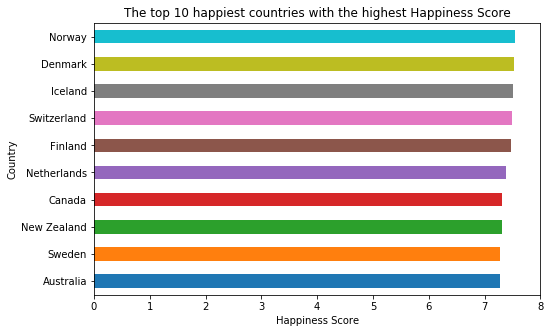

In [31]:
y = df.loc[df.index[:10]]['Happiness Score']
plt.figure(figsize=(8,5))
y = y.sort_values()
colormap = plt.cm.tab10(range(0, len(y)))
plot = y.plot.barh(title='The top 10 happiest countries with the highest Happiness Score', color=colormap)
plt.xlim(0,8)
plot.set_xlabel('Happiness Score')
plot.set_ylabel('Country')
plt.show()

This horizontal bar plot shows a non-significant difference between the Happiness Scores of the top 10 countries.  

### C.2. Horizontal stacked bar plot of the Happiness Score of the top 10 happiest countries

Constructing the stacked bar plot using seaborn library and seaborn documentation. 

To avoid the overlap of the legend box with the bars, setting the x axis limits larger than neccesary for the results (here from 0 till 12 with the highest results below 8).

Another change is inverting the y axis to see the happiest countries from the top.

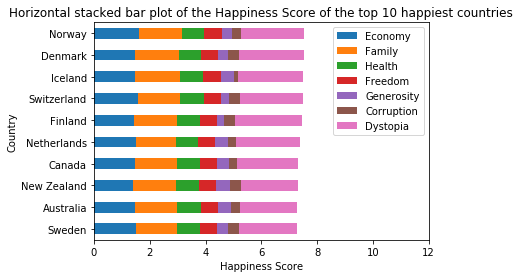

In [32]:
import seaborn as sns
data_top=df.loc[df.index[:10]][['Economy','Family','Health', 'Freedom', 'Generosity', 'Corruption','Dystopia']]
data_top.plot.barh(stacked=True, title='Horizontal stacked bar plot of the Happiness Score of the top 10 happiest countries')
plt.xlabel('Happiness Score')
plt.xlim([0,12])
plt.ylim(reversed(plt.ylim()))
plt.show()

The alternative method to avoid the overlap is to set the legend out of the plot frame. Personally, I prefer this second method. 

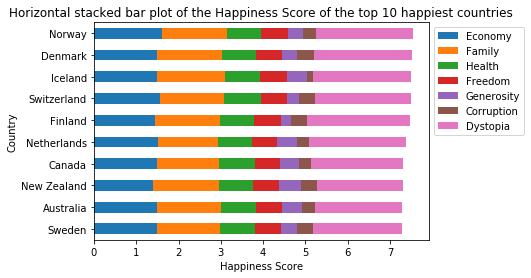

In [33]:
data_top=df.loc[df.index[:10]][['Economy','Family','Health', 'Freedom', 'Generosity', 'Corruption','Dystopia']]
data_top.plot.barh(stacked=True, title='Horizontal stacked bar plot of the Happiness Score of the top 10 happiest countries')
plt.xlabel('Happiness Score')
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(reversed(plt.ylim()))
plt.show()

### C.3. Horizontal stacked bar plot of the Happiness Score of all countries from the region Africa

Using the dataset africa from the question B.1.3 and increasing the size of the y axes to better see the names of the counries and of the x axes to better see the smaller parameters (for example, 'Corruption').

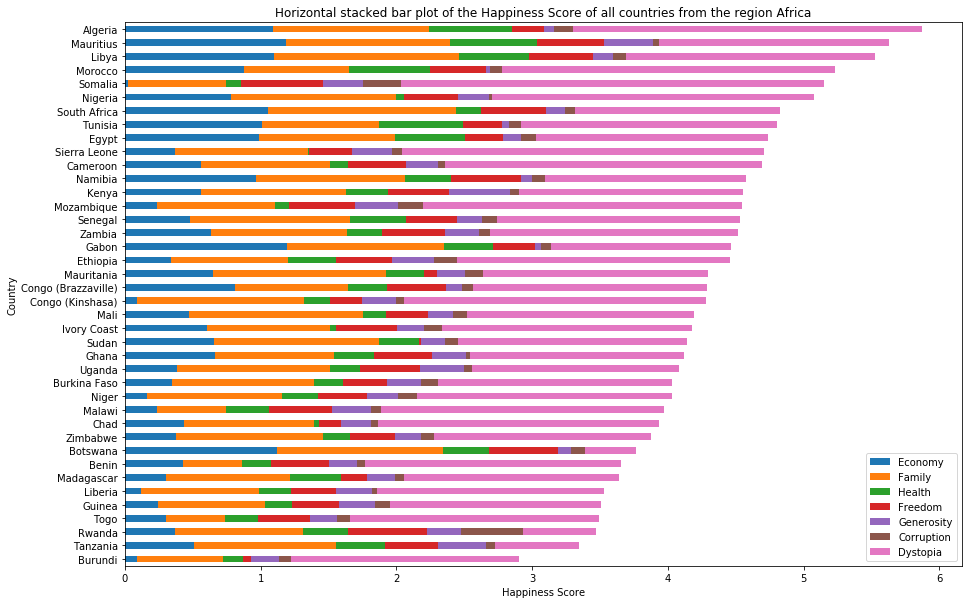

In [34]:
data_af=africa[['Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia']]
data_af.plot.barh(stacked=True, figsize=(15,10), title='Horizontal stacked bar plot of the Happiness Score of all countries from the region Africa')
plt.xlabel('Happiness Score')
plt.ylim(reversed(plt.ylim()))
plt.show()

## D. Histogram of Job Satisfaction

Text(0, 0.5, 'Percentage of categories')

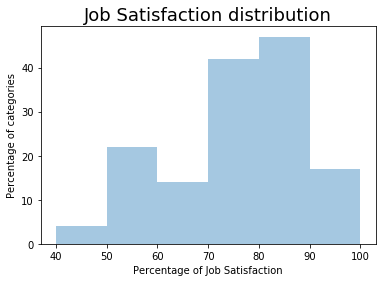

In [35]:
sns.distplot(df['Job Satisfaction'], bins=6, kde=False, hist_kws={'range': (40.0, 100.0)})
plt.title('Job Satisfaction distribution', fontsize=18)
plt.xlabel('Percentage of Job Satisfaction')
plt.ylabel('Percentage of categories')

## E. Pairwise Scatter plots

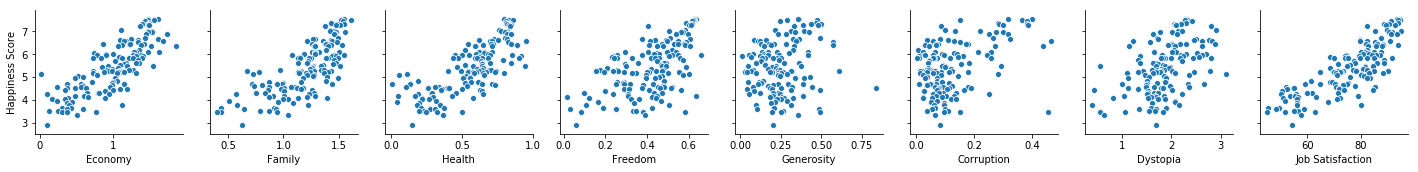

In [36]:
sns.pairplot(df,
             x_vars=['Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia','Job Satisfaction'],
             y_vars=["Happiness Score"])

## F. Correlation

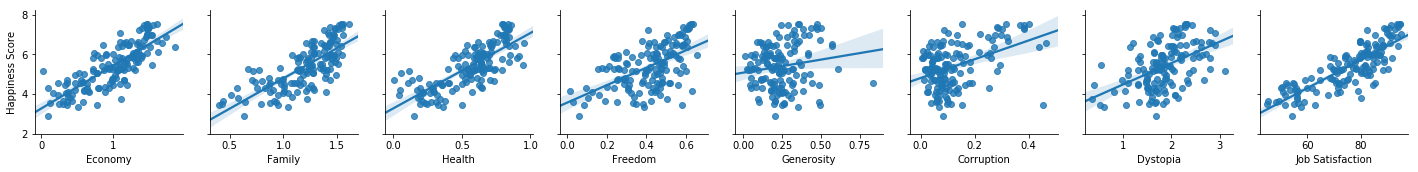

In [37]:
sns.pairplot(df,kind='reg',
             x_vars=['Economy','Family','Health','Freedom','Generosity','Corruption','Dystopia','Job Satisfaction'],
             y_vars=["Happiness Score"])


* Which variable has the highest correlation with the Happiness Score?  

According to the regression line the highest correlation is with Job Satisfaction (or Economy). 
To control numerically:

In [38]:
corr = df.corr()
corr['Happiness Score'].sort_values (ascending=False)

Happiness Score     1.000000
Job Satisfaction    0.824810
Economy             0.804390
Health              0.769818
Family              0.748542
Freedom             0.568870
Dystopia            0.493069
Corruption          0.438540
Generosity          0.158920
Happiness Rank     -0.993777
Name: Happiness Score, dtype: float64

As expected, the result shows the highest correlation of the Happiness Score with the Job Satisfaction.

## G. Probabilities

In [39]:
import random

country = df[df['Happiness Score'] > 6] 
experiments = 10000
counter = 0
for i in range(experiments):
    region = df['Region'][random.randrange(len(country))]
    if region=='Western Europe':
        counter += 1

counter / experiments


0.3808

The result is quite accurate taking in account that there are 17 western european countries out of 44 countries with the Happiness Score >6 (question B3). 

In [40]:
17/sum(df[df['Happiness Score'] > 6].groupby('Region').size())  

0.38636363636363635

## H. Matrices

H.1. Creating a one-dimentional array for each region for 146 countries by copying the groups created for the question B.1.3, and turning the boolian values into the integers 0 or 1. 

In [41]:
af = np.array(df['Region']=='Africa').astype(int)
ap = np.array(df['Region']=='Asia-Pacific').astype(int)
ee = np.array(df['Region']=='Eastern Europe').astype(int)
la = np.array(df['Region']=='Latin America').astype(int)
na = np.array(df['Region']=='North America').astype(int)
we = np.array(df['Region']=='Western Europe').astype(int)

H.2. Creating a matrice with the shape (6,146) which unifies all the 6 region arrays with the shape(1,146). 

In [42]:
country_region=np.array([af,ap,ee,la,na,we])

H.3. Creating the transpose of the matrice with the shape (146,6). 

In [43]:
country_region.T

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 

---------------
Observation: Sweden and Australia have the same Happiness Score. In the horizontal bar plot of the top 10 happiest countries Sweden is on the 9th place, Australia on the 10th row. 
Here in the matrice  the region of the 9th country is Asia-Pacific, of the 10th country - Western Europe, so in the matrice Asutralia is before Sweden (as well as in the dataset sorted by Happiness Score).
---------------